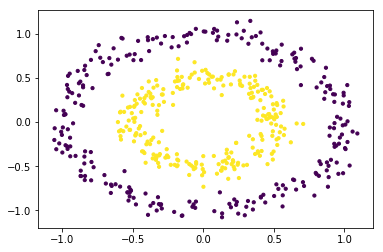

In [9]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler

noisy_circles, noisy_circles_labels  = datasets.make_circles(n_samples=500, factor=.5,
                                      noise=.07)
#print(noisy_circles)
plt.scatter(noisy_circles[:, 0], noisy_circles[:, 1], s=10, c=noisy_circles_labels)

plt.show()

In [10]:
from sklearn.svm import OneClassSVM

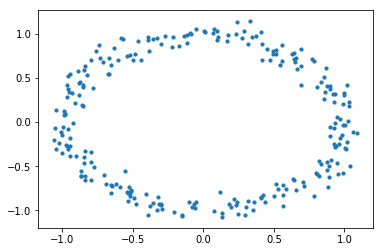

In [11]:
inliers = np.where(noisy_circles_labels==0)[0]
outliers = np.where(noisy_circles_labels==1)[0]
X_train = noisy_circles[inliers]
Y_train = noisy_circles[outliers]
plt.scatter(X_train[:, 0], X_train[:, 1], s=10)

plt.show()

1 for inliers, -1 for outliers.

In [ ]:
from sklearn.svm import OneClassSVM
for g in np.linspace(0.1, 10000, 500):
    clf = OneClassSVM(gamma=g, kernel = 'rbf').fit(X)
    predicted_labels = clf.predict(Y)
    plt.scatter(Y[:, 0], Y[:, 1], s=10, c=predicted_labels)
    plt.scatter(X[:, 0], X[:, 1], s=10, c=np.ones(len(X)))
    plt.show()

In [ ]:
### why is it identifying points that it learned on as inliers?
### try to use actual libsvm - install the binaries and explain the process
### try reversed labels, then file an issue if it's not matching with libsvm

from sklearn.svm import OneClassSVM
for g in np.linspace(0.1, 10000, 500):
    clf = OneClassSVM(gamma=g, kernel = 'rbf').fit(Y)
    predicted_labels = clf.predict(Y)
    plt.scatter(X[:, 0], X[:, 1], s=10, c=predicted_labels)
    plt.scatter(Y[:, 0], Y[:, 1], s=10, c=np.ones(len(Y)))
    print(g)
    plt.show()

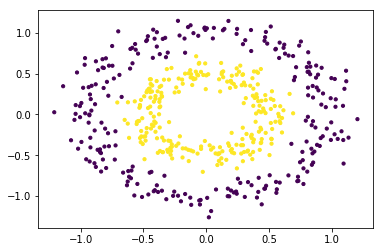

In [20]:
noisy_circles_test, noisy_circles_test_labels  = datasets.make_circles(n_samples=500, factor=.5,
                                      noise=.1)
#print(noisy_circles)
plt.scatter(noisy_circles_test[:, 0], noisy_circles_test[:, 1], s=10, c=noisy_circles_test_labels)

plt.show()

In [21]:
inliers = np.where(noisy_circles_test_labels==0)[0]
outliers = np.where(noisy_circles_test_labels==1)[0]
### test
X = noisy_circles_test[inliers]
Y = noisy_circles_test[outliers]

0.402


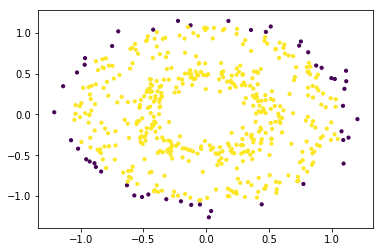

0.402


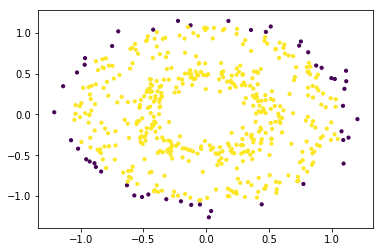

0.402


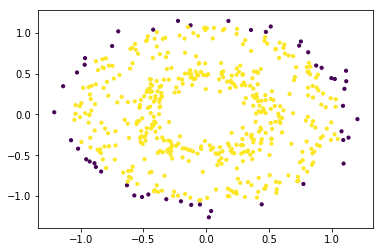

0.404


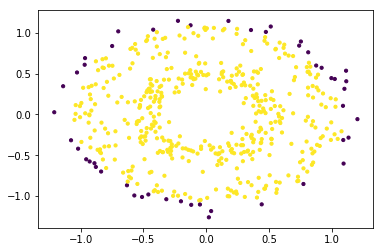

0.404


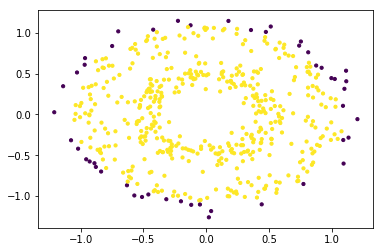

0.404


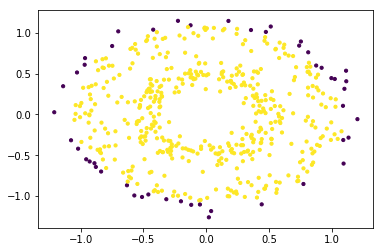

0.404


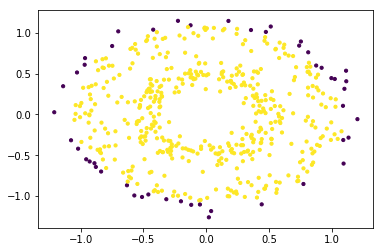

0.408


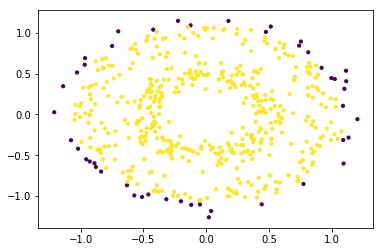

0.406


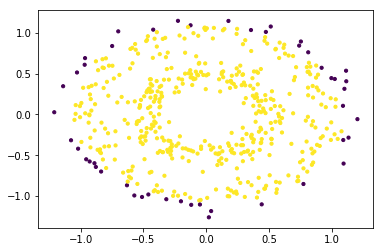

0.404


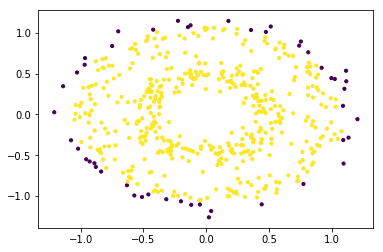

0.398


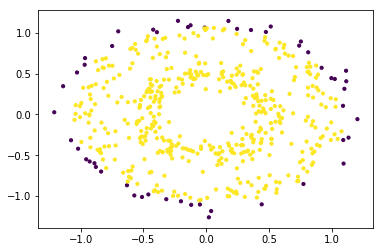

0.396


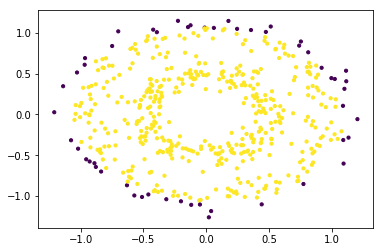

0.396


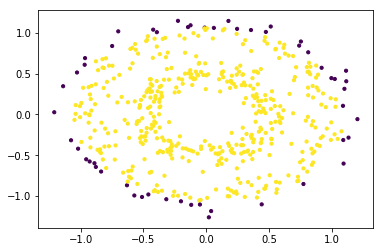

0.404


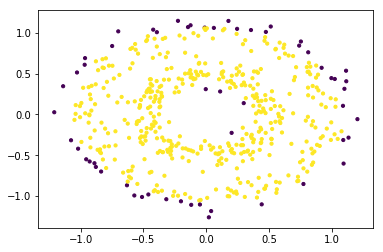

0.472


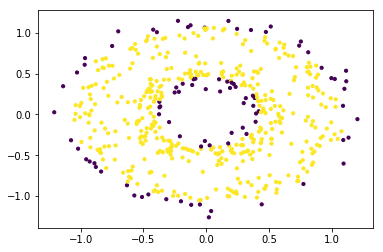

0.624


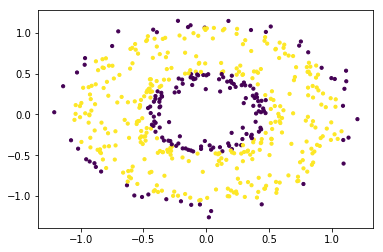

0.704


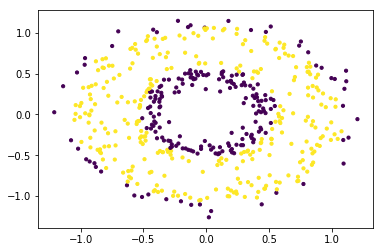

0.786


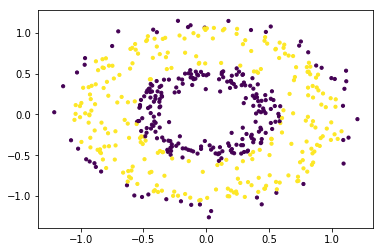

0.838


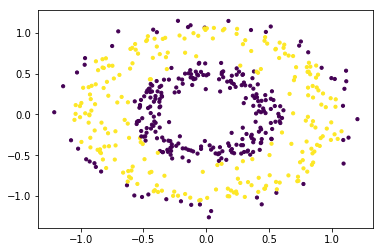

0.868


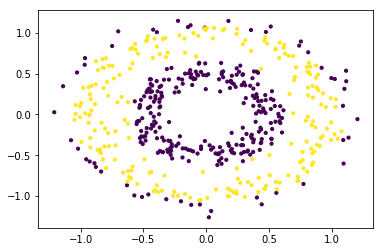

0.88


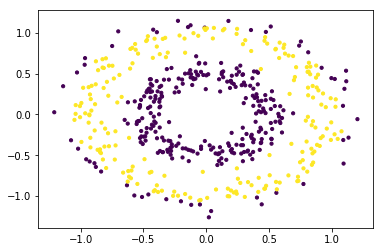

0.884


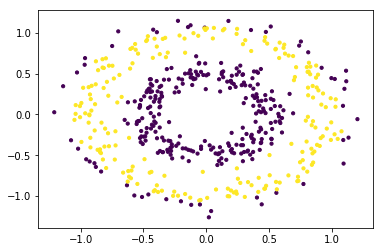

0.89


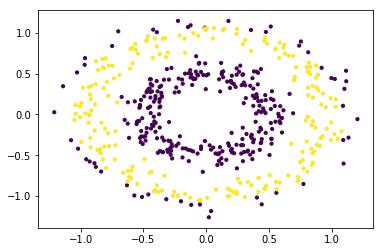

0.892


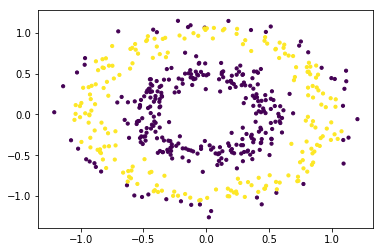

0.892


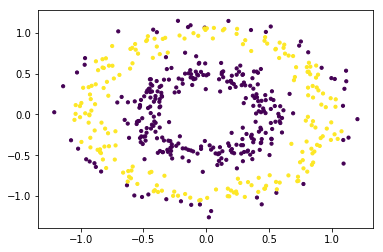

0.892


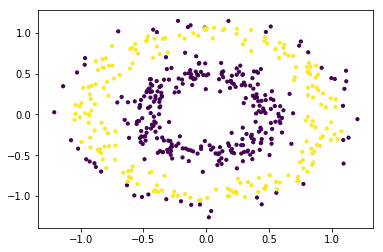

0.88


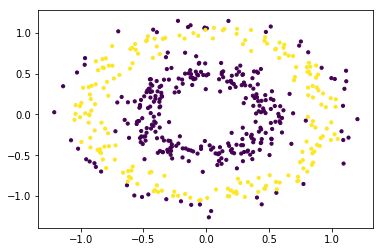

0.876


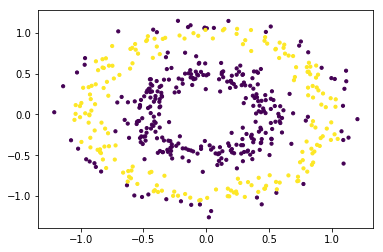

0.876


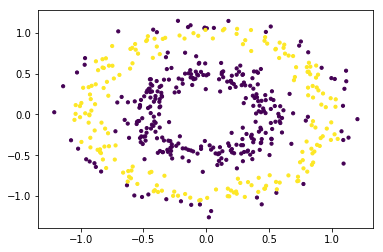

0.87


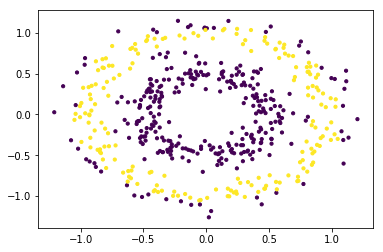

0.872


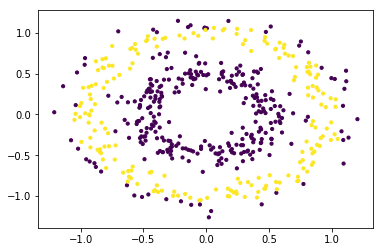

0.876


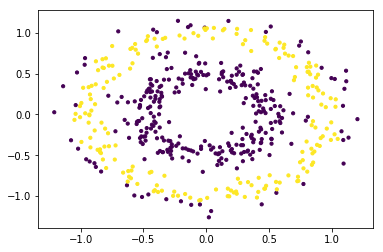

0.876


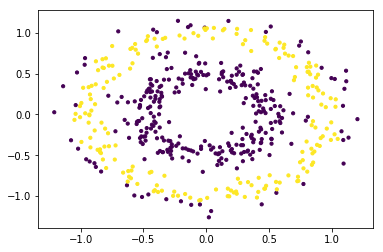

0.876


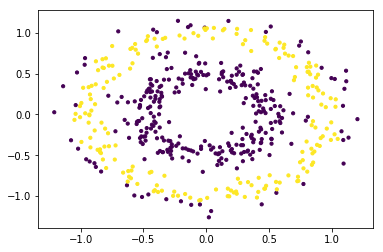

0.874


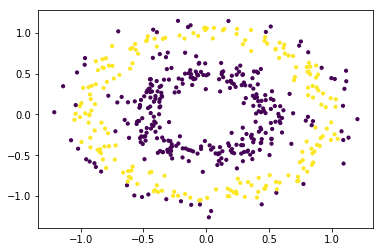

0.874


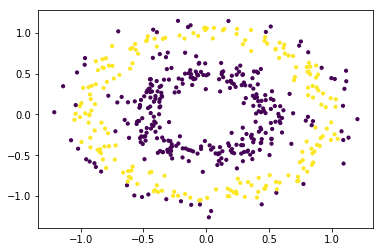

0.874


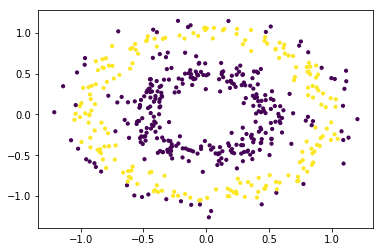

0.874


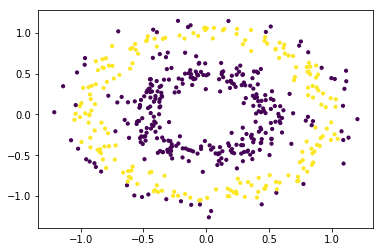

0.874


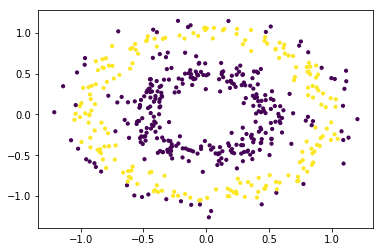

0.874


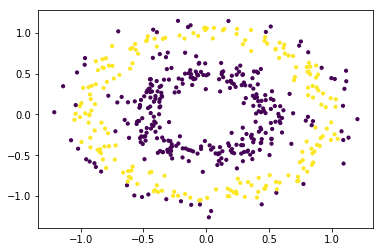

0.872


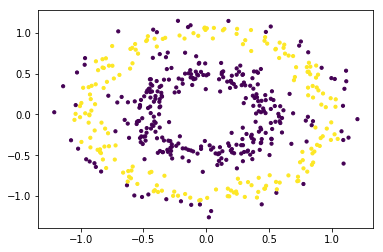

0.874


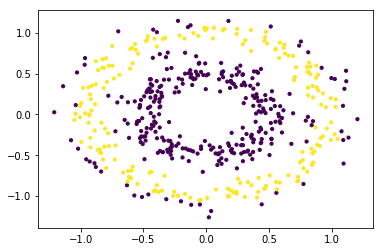

0.872


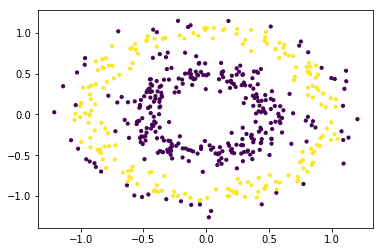

0.872


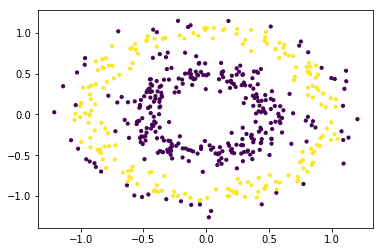

0.872


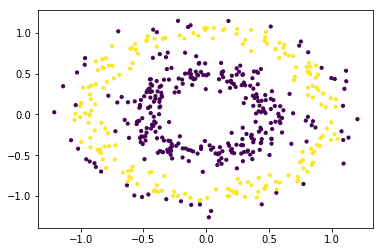

0.872


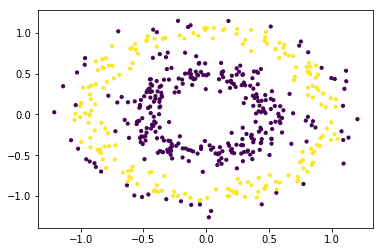

0.872


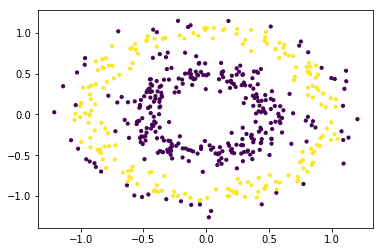

0.872


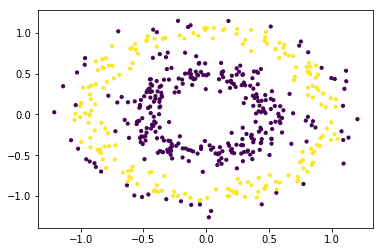

0.87


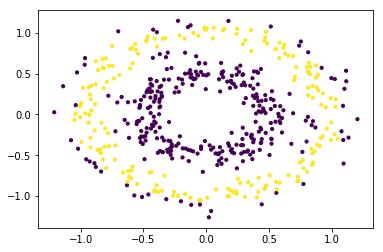

0.87


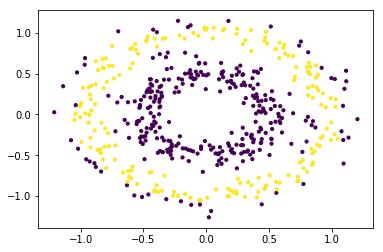

In [43]:
### first take a look at gamma
import sklearn
from sklearn.svm import OneClassSVM
for g in np.linspace(0.5, 3, 50):
    clf = OneClassSVM(gamma=g, kernel = 'rbf', nu = 0.1).fit(X_train)
    ### but here we include training set, let's generate another circle for test: data
    data = np.concatenate((X,Y))
    predicted_labels = clf.predict(data)
    
    plt.scatter(data[:, 0], data[:, 1], s=10, c=predicted_labels)
    print(sklearn.metrics.accuracy_score(np.concatenate((np.ones(len(X)), -np.ones(len(Y)))), predicted_labels))
    plt.show()

It has an issue of recongising the inlies as inliers even on the training set - it's too tight cover
Maybe we can change it with hyperparameter?

accuracy 0.78
nu=0.00,error measure not involving true labels is 17.71


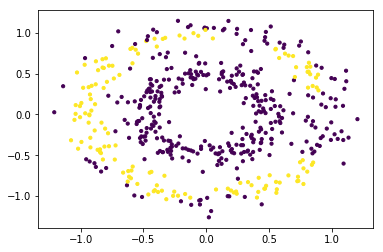

accuracy 0.888
nu=0.02,error measure not involving true labels is 0.19


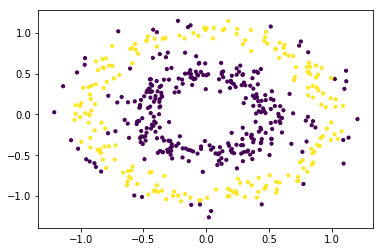

accuracy 0.89
nu=0.04,error measure not involving true labels is 0.17


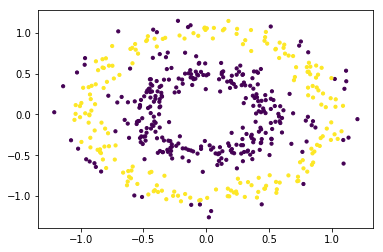

accuracy 0.878
nu=0.06,error measure not involving true labels is 0.00


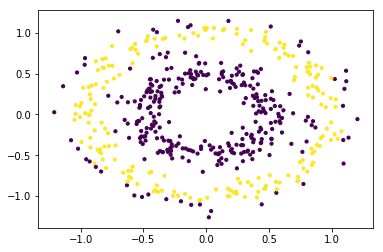

accuracy 0.87
nu=0.08,error measure not involving true labels is 0.02


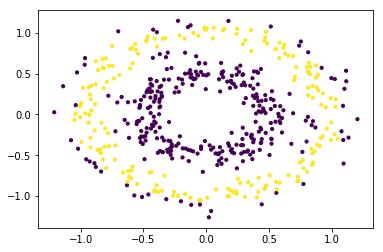

accuracy 0.87
nu=0.10,error measure not involving true labels is 0.02


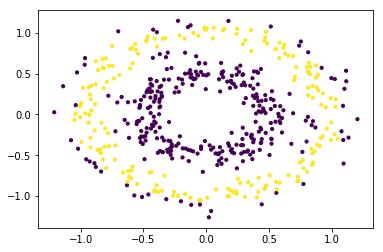

accuracy 0.864
nu=0.12,error measure not involving true labels is 0.15


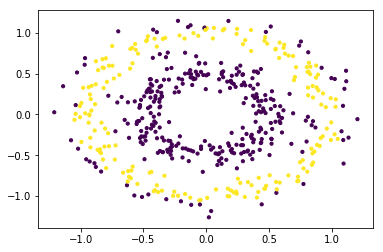

accuracy 0.854
nu=0.14,error measure not involving true labels is 0.34


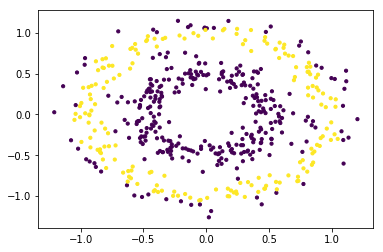

accuracy 0.85
nu=0.16,error measure not involving true labels is 0.36


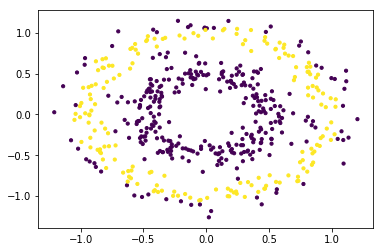

accuracy 0.834
nu=0.18,error measure not involving true labels is 0.51


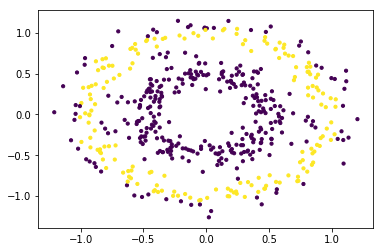

accuracy 0.814
nu=0.20,error measure not involving true labels is 0.95


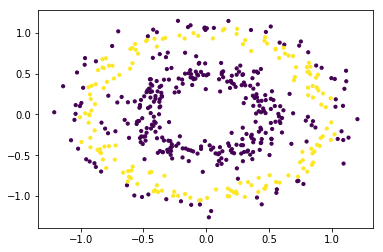

accuracy 0.802
nu=0.22,error measure not involving true labels is 0.74


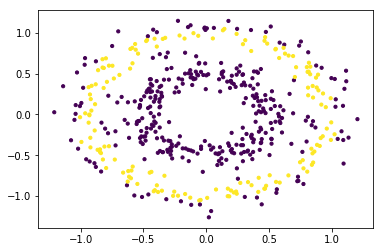

accuracy 0.794
nu=0.24,error measure not involving true labels is 0.38


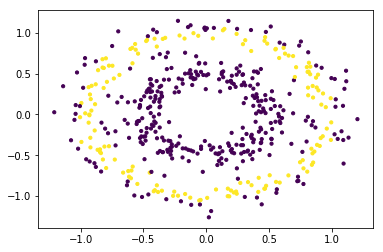

accuracy 0.772
nu=0.26,error measure not involving true labels is 0.35


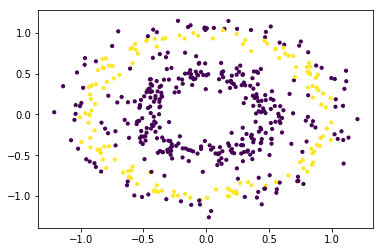

accuracy 0.756
nu=0.28,error measure not involving true labels is 0.05


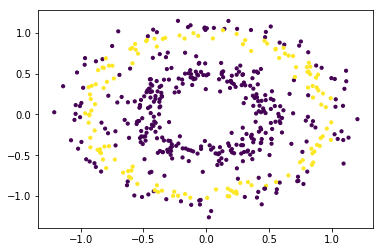

accuracy 0.746
nu=0.30,error measure not involving true labels is 0.09


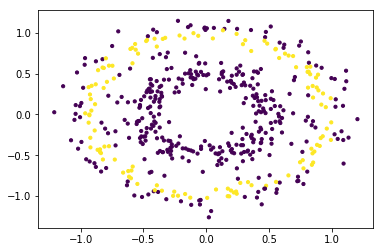

accuracy 0.734
nu=0.32,error measure not involving true labels is 0.31


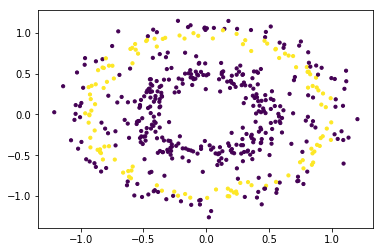

accuracy 0.734
nu=0.34,error measure not involving true labels is 0.45


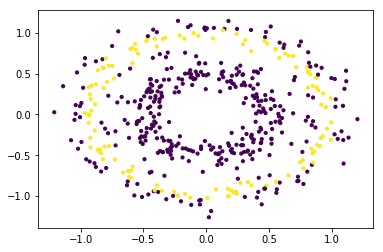

accuracy 0.728
nu=0.36,error measure not involving true labels is 1.05


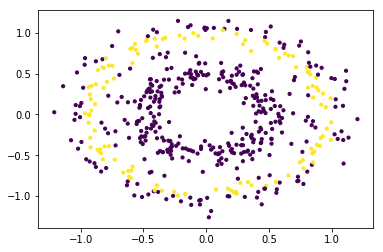

accuracy 0.722
nu=0.38,error measure not involving true labels is 1.44


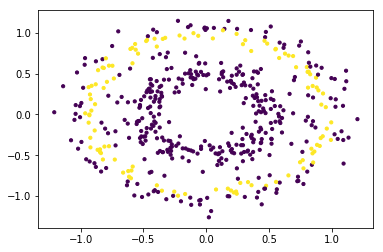

accuracy 0.712
nu=0.40,error measure not involving true labels is 1.49


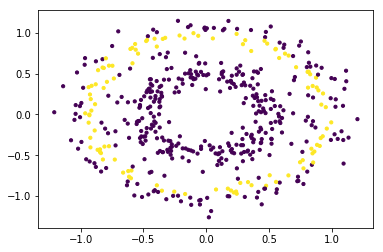

accuracy 0.706
nu=0.42,error measure not involving true labels is 0.81


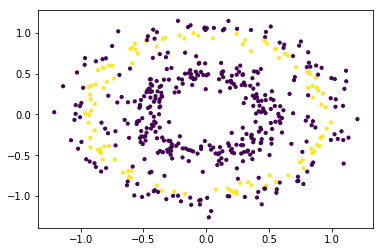

accuracy 0.682
nu=0.44,error measure not involving true labels is 2.58


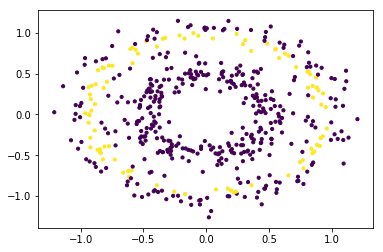

accuracy 0.668
nu=0.46,error measure not involving true labels is 3.24


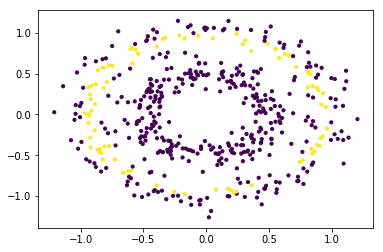

accuracy 0.668
nu=0.48,error measure not involving true labels is 3.32


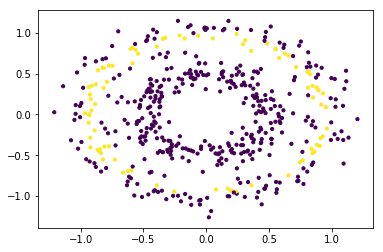

accuracy 0.664
nu=0.49,error measure not involving true labels is 2.55


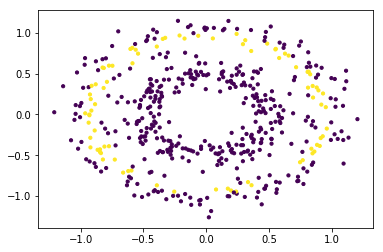

accuracy 0.658
nu=0.51,error measure not involving true labels is 2.99


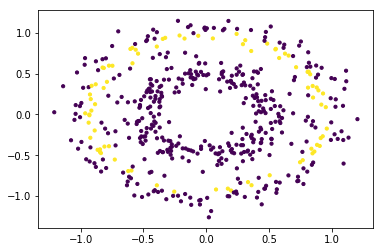

accuracy 0.652
nu=0.53,error measure not involving true labels is 1.50


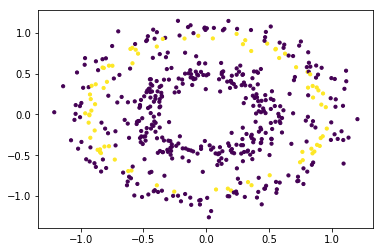

accuracy 0.632
nu=0.55,error measure not involving true labels is 0.62


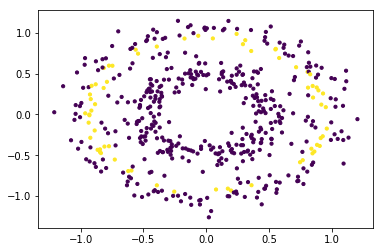

accuracy 0.632
nu=0.57,error measure not involving true labels is 0.25


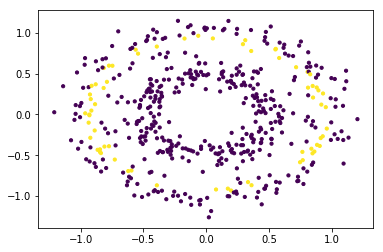

accuracy 0.622
nu=0.59,error measure not involving true labels is 0.07


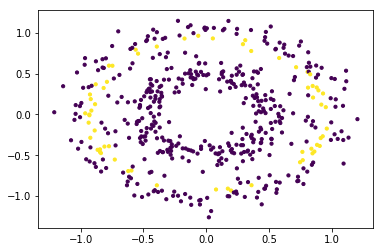

accuracy 0.626
nu=0.61,error measure not involving true labels is 0.09


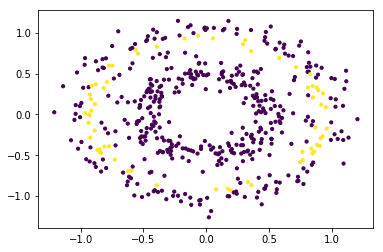

accuracy 0.62
nu=0.63,error measure not involving true labels is 0.10


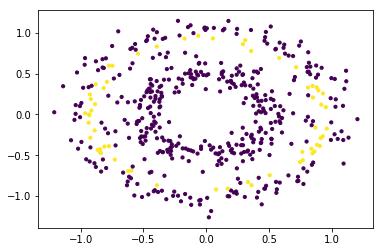

accuracy 0.618
nu=0.65,error measure not involving true labels is 0.20


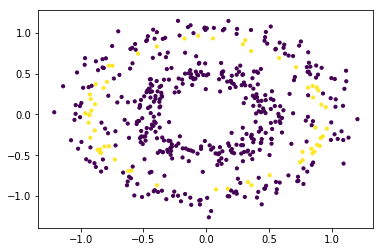

accuracy 0.616
nu=0.67,error measure not involving true labels is 0.16


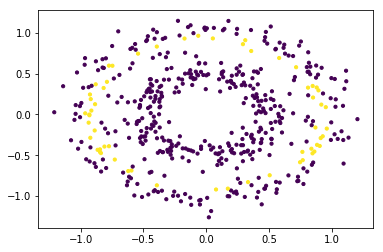

accuracy 0.614
nu=0.69,error measure not involving true labels is 0.26


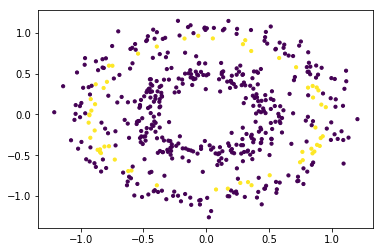

accuracy 0.612
nu=0.71,error measure not involving true labels is 0.22


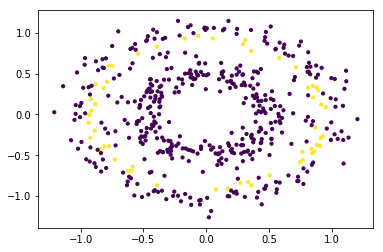

accuracy 0.6
nu=0.73,error measure not involving true labels is 0.74


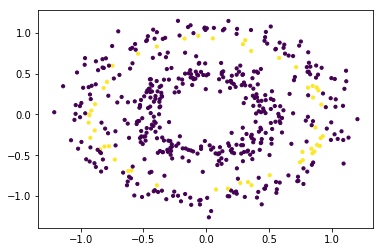

accuracy 0.594
nu=0.75,error measure not involving true labels is 1.55


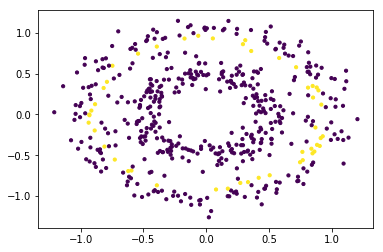

accuracy 0.584
nu=0.77,error measure not involving true labels is 1.28


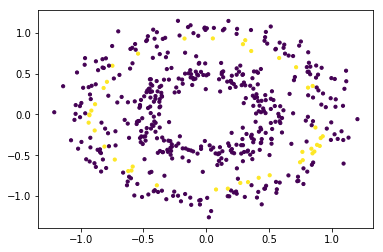

accuracy 0.582
nu=0.79,error measure not involving true labels is 1.94


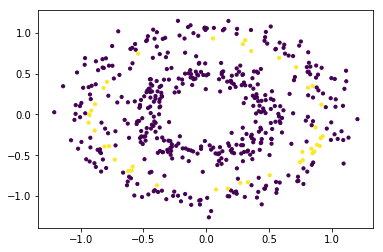

accuracy 0.57
nu=0.81,error measure not involving true labels is 1.80


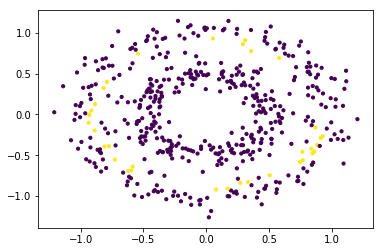

accuracy 0.556
nu=0.83,error measure not involving true labels is 0.83


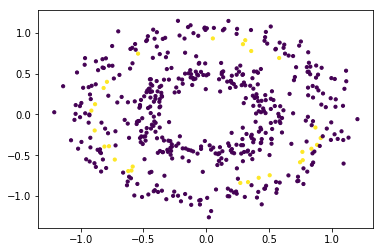

accuracy 0.55
nu=0.85,error measure not involving true labels is 1.50


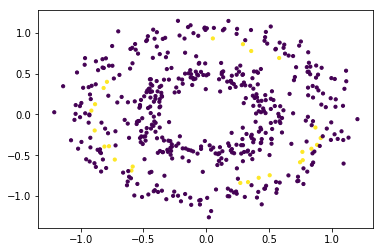

accuracy 0.548
nu=0.87,error measure not involving true labels is 0.82


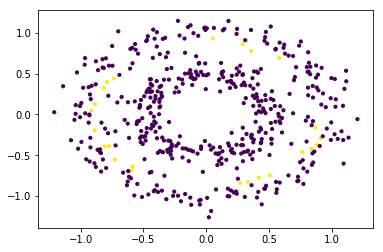

accuracy 0.542
nu=0.89,error measure not involving true labels is 1.00


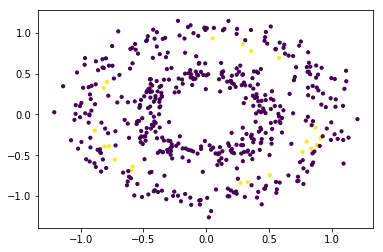

accuracy 0.544
nu=0.91,error measure not involving true labels is 1.48


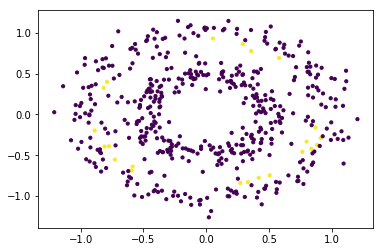

accuracy 0.526
nu=0.93,error measure not involving true labels is 0.71


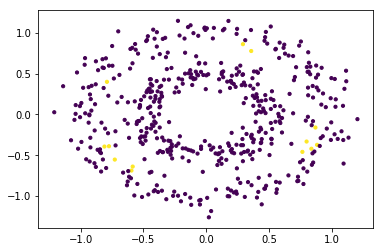

accuracy 0.526
nu=0.95,error measure not involving true labels is 0.71


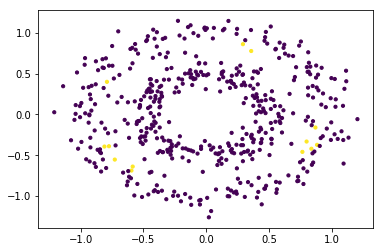

accuracy 0.524
nu=0.97,error measure not involving true labels is 1.23


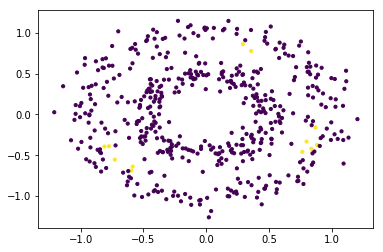

In [33]:
### then on nu: 
### nu - upper bound on the fraction of training errors 
### nu - also a lower bound of the fraction of support vectors
for nu in np.linspace(0.0001, 0.97, 50):
    clf = OneClassSVM(nu=nu, kernel = 'rbf', gamma = 3).fit(X_train)
    data = np.concatenate((X,Y))
    predicted_labels = clf.predict(data)
    
    plt.scatter(data[:, 0], data[:, 1], s=10, c=predicted_labels)
    ### but here we include training set, let's generate another circle
    print("accuracy", sklearn.metrics.accuracy_score(np.concatenate((np.ones(len(X)), -np.ones(len(Y)))), predicted_labels))
    print('nu={:.2f},error measure not involving true labels is {:.2f}'.format(nu,sklearn.metrics.calinski_harabaz_score(data, predicted_labels)))
   
    plt.show()

accuracy 0.78
nu=0.00, gamma =0.50, error measure not involving true labels is 17.71


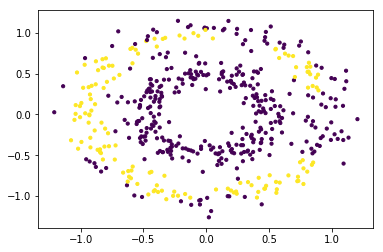

accuracy 0.78
nu=0.00, gamma =5.42, error measure not involving true labels is 17.71


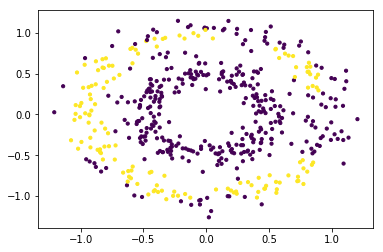

accuracy 0.78
nu=0.00, gamma =10.33, error measure not involving true labels is 17.71


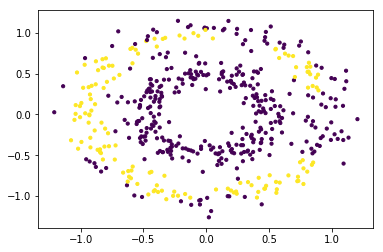

accuracy 0.78
nu=0.00, gamma =15.25, error measure not involving true labels is 17.71


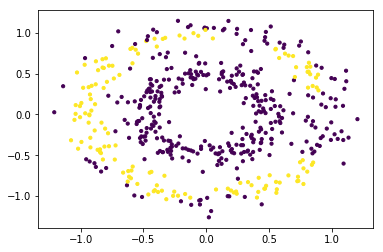

accuracy 0.78
nu=0.00, gamma =20.17, error measure not involving true labels is 17.71


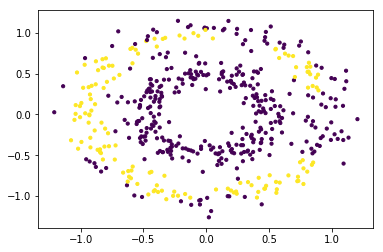

accuracy 0.78
nu=0.00, gamma =25.08, error measure not involving true labels is 17.71


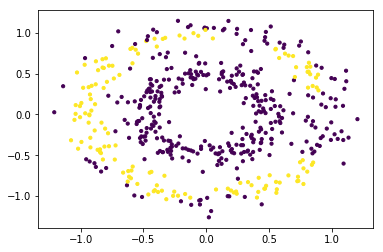

accuracy 0.78
nu=0.00, gamma =30.00, error measure not involving true labels is 17.71


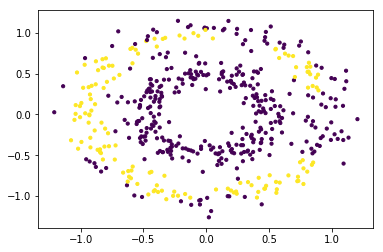

accuracy 0.866
nu=0.12, gamma =0.50, error measure not involving true labels is 0.08


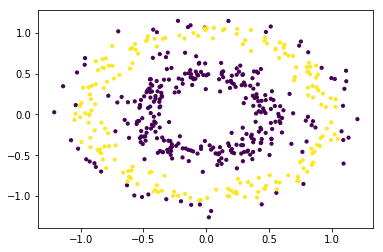

accuracy 0.866
nu=0.12, gamma =5.42, error measure not involving true labels is 0.08


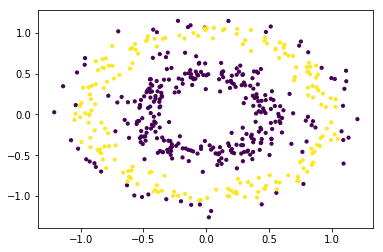

accuracy 0.866
nu=0.12, gamma =10.33, error measure not involving true labels is 0.08


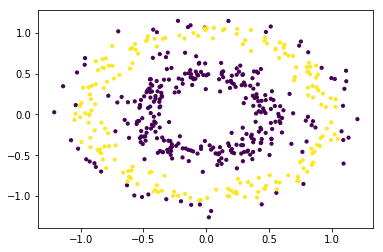

accuracy 0.866
nu=0.12, gamma =15.25, error measure not involving true labels is 0.08


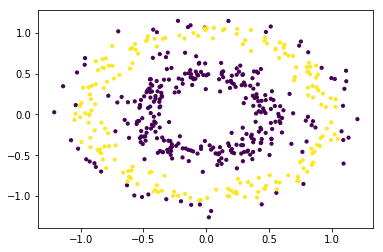

accuracy 0.866
nu=0.12, gamma =20.17, error measure not involving true labels is 0.08


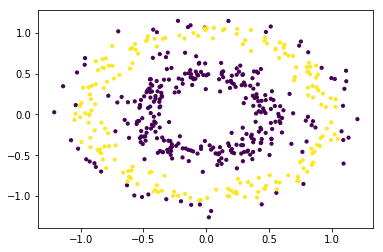

accuracy 0.866
nu=0.12, gamma =25.08, error measure not involving true labels is 0.08


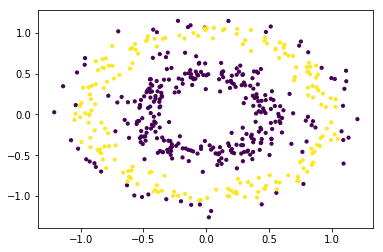

accuracy 0.866
nu=0.12, gamma =30.00, error measure not involving true labels is 0.08


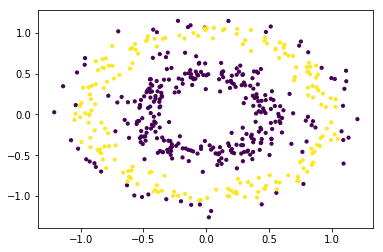

accuracy 0.794
nu=0.23, gamma =0.50, error measure not involving true labels is 0.38


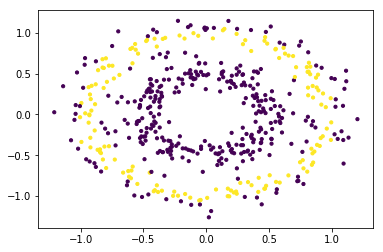

accuracy 0.794
nu=0.23, gamma =5.42, error measure not involving true labels is 0.38


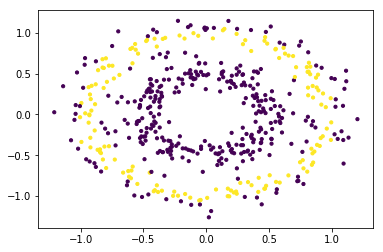

accuracy 0.794
nu=0.23, gamma =10.33, error measure not involving true labels is 0.38


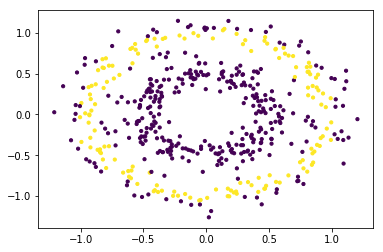

accuracy 0.794
nu=0.23, gamma =15.25, error measure not involving true labels is 0.38


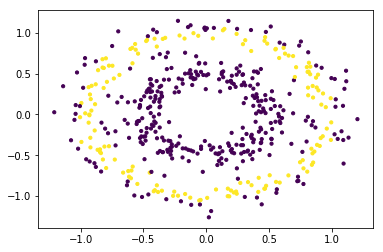

accuracy 0.794
nu=0.23, gamma =20.17, error measure not involving true labels is 0.38


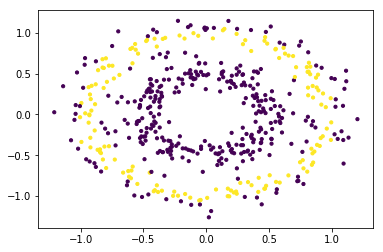

accuracy 0.794
nu=0.23, gamma =25.08, error measure not involving true labels is 0.38


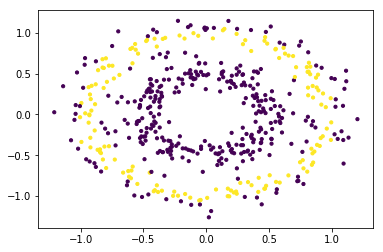

accuracy 0.794
nu=0.23, gamma =30.00, error measure not involving true labels is 0.38


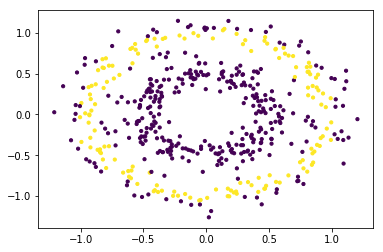

accuracy 0.728
nu=0.35, gamma =0.50, error measure not involving true labels is 1.05


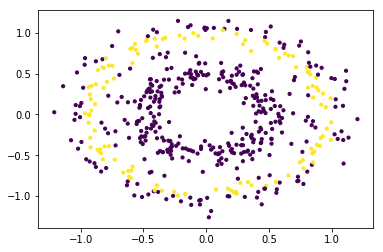

accuracy 0.728
nu=0.35, gamma =5.42, error measure not involving true labels is 1.05


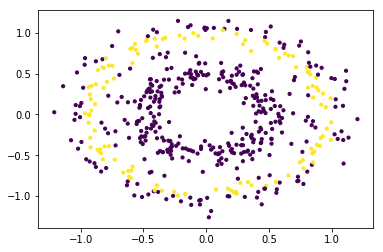

accuracy 0.728
nu=0.35, gamma =10.33, error measure not involving true labels is 1.05


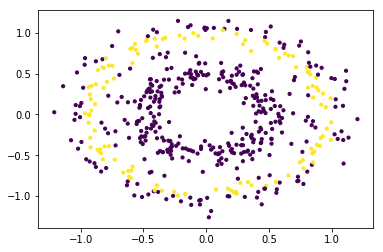

accuracy 0.728
nu=0.35, gamma =15.25, error measure not involving true labels is 1.05


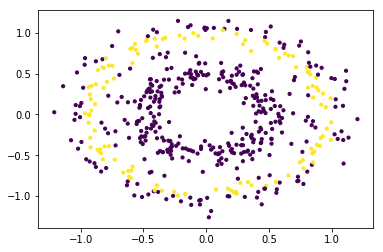

accuracy 0.728
nu=0.35, gamma =20.17, error measure not involving true labels is 1.05


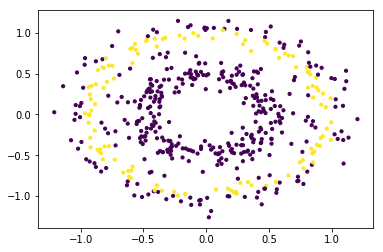

accuracy 0.728
nu=0.35, gamma =25.08, error measure not involving true labels is 1.05


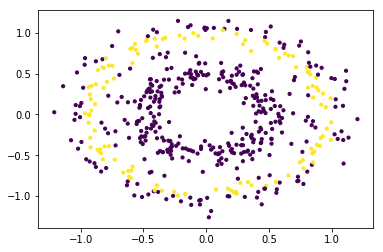

accuracy 0.728
nu=0.35, gamma =30.00, error measure not involving true labels is 1.05


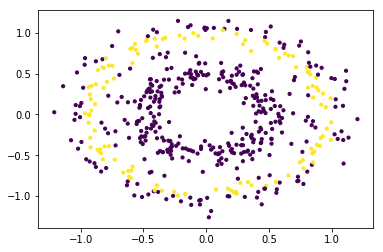

accuracy 0.67
nu=0.47, gamma =0.50, error measure not involving true labels is 2.82


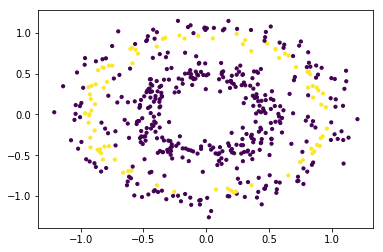

accuracy 0.67
nu=0.47, gamma =5.42, error measure not involving true labels is 2.82


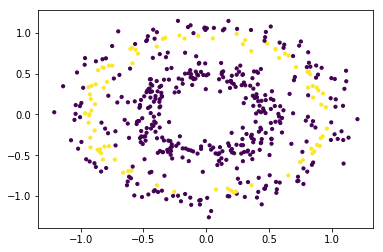

accuracy 0.67
nu=0.47, gamma =10.33, error measure not involving true labels is 2.82


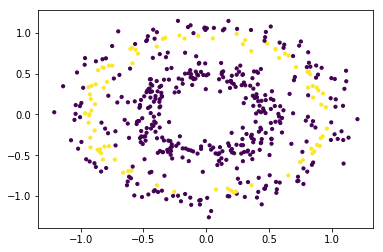

accuracy 0.67
nu=0.47, gamma =15.25, error measure not involving true labels is 2.82


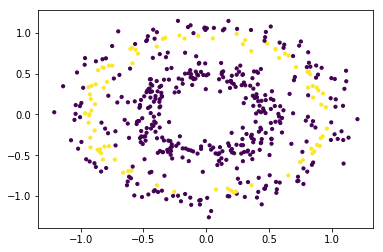

accuracy 0.67
nu=0.47, gamma =20.17, error measure not involving true labels is 2.82


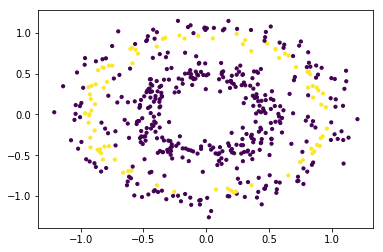

accuracy 0.67
nu=0.47, gamma =25.08, error measure not involving true labels is 2.82


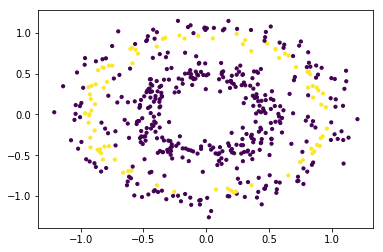

accuracy 0.67
nu=0.47, gamma =30.00, error measure not involving true labels is 2.82


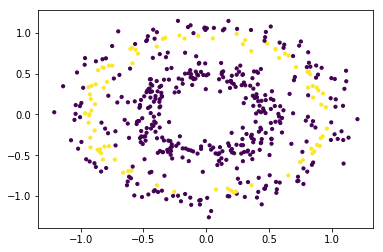

accuracy 0.626
nu=0.58, gamma =0.50, error measure not involving true labels is 0.19


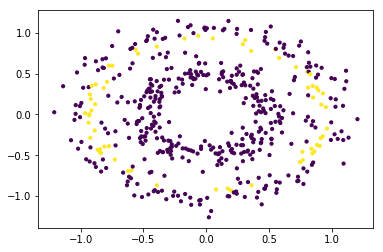

accuracy 0.626
nu=0.58, gamma =5.42, error measure not involving true labels is 0.19


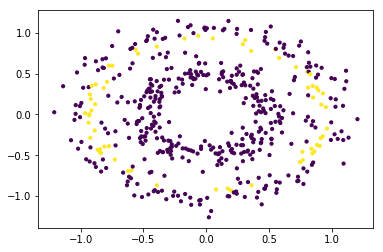

accuracy 0.626
nu=0.58, gamma =10.33, error measure not involving true labels is 0.19


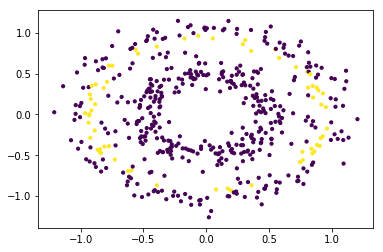

accuracy 0.626
nu=0.58, gamma =15.25, error measure not involving true labels is 0.19


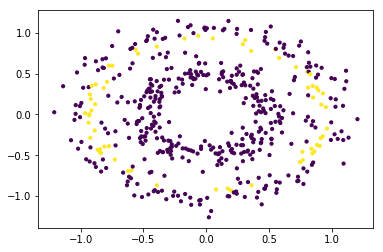

accuracy 0.626
nu=0.58, gamma =20.17, error measure not involving true labels is 0.19


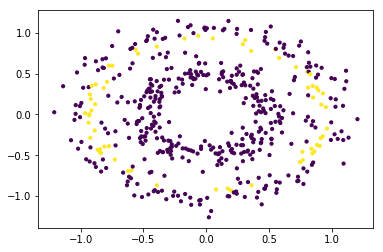

accuracy 0.626
nu=0.58, gamma =25.08, error measure not involving true labels is 0.19


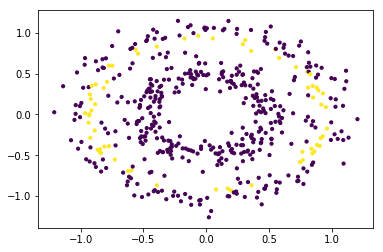

accuracy 0.626
nu=0.58, gamma =30.00, error measure not involving true labels is 0.19


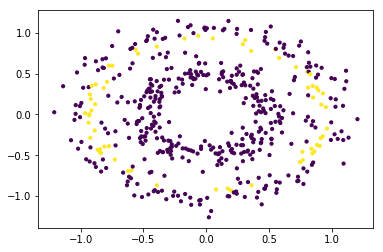

accuracy 0.614
nu=0.70, gamma =0.50, error measure not involving true labels is 0.26


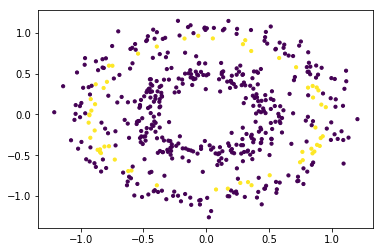

accuracy 0.614
nu=0.70, gamma =5.42, error measure not involving true labels is 0.26


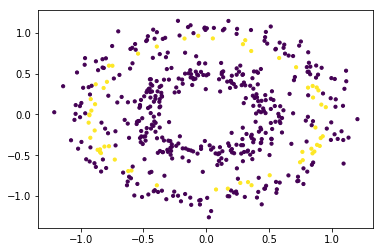

accuracy 0.614
nu=0.70, gamma =10.33, error measure not involving true labels is 0.26


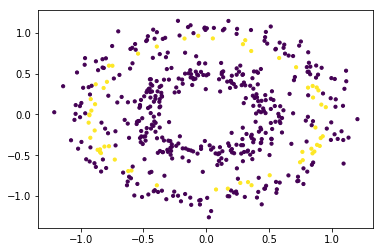

accuracy 0.614
nu=0.70, gamma =15.25, error measure not involving true labels is 0.26


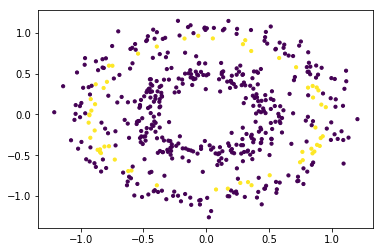

accuracy 0.614
nu=0.70, gamma =20.17, error measure not involving true labels is 0.26


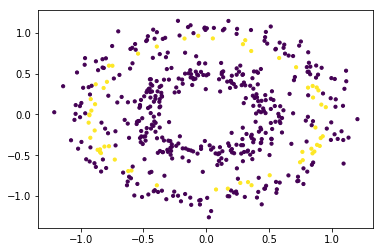

accuracy 0.614
nu=0.70, gamma =25.08, error measure not involving true labels is 0.26


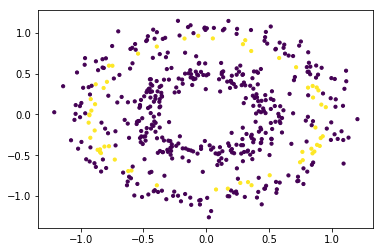

accuracy 0.614
nu=0.70, gamma =30.00, error measure not involving true labels is 0.26


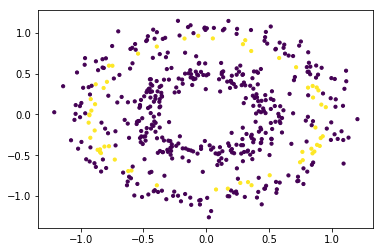

In [37]:
### and both parameters together
for nu in np.linspace(0.0001, 0.7, 7):
    for g in np.linspace(0.5, 30, 7):
        clf = OneClassSVM(nu=nu, kernel = 'rbf', gamma = 3).fit(X_train)
        data = np.concatenate((X,Y))
        predicted_labels = clf.predict(data)

        plt.scatter(data[:, 0], data[:, 1], s=10, c=predicted_labels)
        ### but here we include training set, let's generate another circle
        print("accuracy", sklearn.metrics.accuracy_score(np.concatenate((np.ones(len(X)), -np.ones(len(Y)))), predicted_labels))
        print('nu={:.2f}, gamma ={:.2f}, error measure not involving true labels is {:.2f}'.format(nu,g,sklearn.metrics.calinski_harabaz_score(data, predicted_labels)))

        plt.show()

Interesting article - the more support vectors - the better
https://www.sciencedirect.com/science/article/abs/pii/S0925231220307153

## Conclusions: 

- we train on outer cicle (X_train), then we sample other 2 circles with slightly different noise ratio - (X for inliers, Y for outliers) 
- inliers: outer circle, outliers: inner circle
- has problem recognising the data it was trained on - labels some points it trained on as outliers
- let's use cross validation on this toy data
- also we can see, that cover on the inliers is pretty tight - the points from the circle with slightly bigger radius (that are generated with slightly bigger noise, a bit outside of the outer circle) are always considered as outliers; while points inside (even though harder to separate because of noise) are mostly correctly classified as outliers

## Cite

#### Bibtex:
@article{scikit-learn,
 title={Scikit-learn: Machine Learning in {P}ython},
 author={Pedregosa, F. and Varoquaux, G. and Gramfort, A. and Michel, V.
         and Thirion, B. and Grisel, O. and Blondel, M. and Prettenhofer, P.
         and Weiss, R. and Dubourg, V. and Vanderplas, J. and Passos, A. and
         Cournapeau, D. and Brucher, M. and Perrot, M. and Duchesnay, E.},
 journal={Journal of Machine Learning Research},
 volume={12},
 pages={2825--2830},
 year={2011}
}

## Cross Validation

- #### in one class problems, notion of accuracy is out of place, so we might want to consider another metrics to pass to score parameter


- #### maybe it is posible to set up the rejection rate for set (i.e, testing on training set yields 95% inliers, 5% outliers)

- #### moreover, if the training is considered only on training set, that includes only instances of one class (inliers), so finding the score only for training set is a non-trivial task

- #### as for evaluating the performance in context of clustering, really helpful article on that topic https://medium.com/@haataa/how-to-measure-clustering-performances-when-there-are-no-ground-truth-db027e9a871c

- #### as structure of the individual clusters is highly non-convex, in our case calinski harabaz score should be smaller - quite the opposite to the usual connotation 


In [45]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
clf = OneClassSVM(nu=nu, kernel = 'rbf', gamma = 3)
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
cv

ShuffleSplit(n_splits=5, random_state=0, test_size=0.3, train_size=None)

In [72]:
rejection_rate = 0.05

In [68]:
### here we are not even using y - the labels
### then we don't pass labels to cross_val_score parameter
def score_calinski_harabaz(estimator, X):
    estimator.fit(X)
    predicted_labels = estimator.predict(X)
    return sklearn.metrics.calinski_harabaz_score(X, predicted_labels)

In [69]:
X_train.shape

(250, 2)

In [70]:
scores = cross_val_score(clf, X_train, cv=3, scoring = score_calinski_harabaz)
scores
print("Calinski harabaz score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Calinski harabaz score: 0.86 (+/- 0.66)


In [71]:
data = np.concatenate((X,Y))
scores = cross_val_score(clf, data, cv=3, scoring = score_calinski_harabaz)
scores
print("Calinski harabaz score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Calinski harabaz score: 0.34 (+/- 0.44)
